# Validation numérique des résultats pour l'homogénéisation
On s'intéresse au problème suivant :
\begin{cases}
    -\frac{d}{dx}\left( a_\epsilon(x) \frac{du}{dx} \right) = f(x), & \text{pour } x \in [a,b] \\
    u(a) = u(b) = 0.
\end{cases}

On posera $a=0$ et $b=1$
 

In [1]:
a = 0
b = 1

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import code_python as homogenization

# Approximation de la solution par la solution homogénéisée


La fonction test $a_{eps}(x) = 2 + sin(\frac{\pi x}{\epsilon})$\
Et le second membre $f(x)=1+x$
    

In [4]:
def test_per(y):
    return 2+np.sin(y*np.pi)
def test_eps(x,eps):
    return 2+np.sin(x*np.pi/eps)

def f(x):
    return 1+x

C:\Users\ethem\Desktop\stage-m1\homogenization-learn\code_python\DF_1d.py:62: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A,b)
C:\Users\ethem\Desktop\stage-m1\homogenization-learn\code_python\DF_1d.py:19: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A,b)


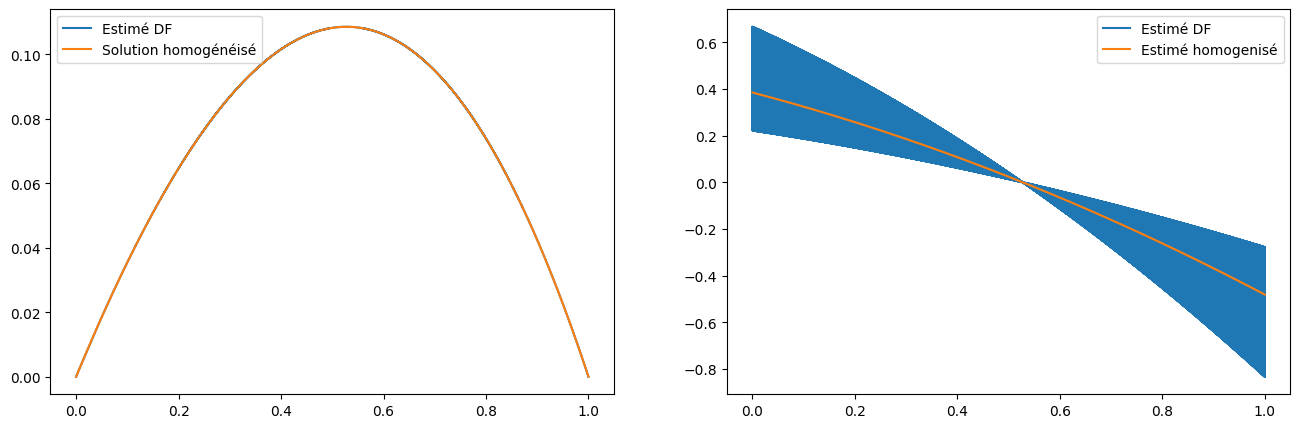

Erreur L2 relative entre la solution homogénéisée et la solution calculée par DF:  7.447090004596114e-06
Erreur L2 relative entre les dérivées de la solution homogénéisée et de la solution calculée par DF:  0.366024666972082


In [5]:
number_of_periode = 100000
number_of_discretization = 10
eps = 1/number_of_periode
h=eps/number_of_discretization
n = number_of_periode*number_of_discretization

X = np.linspace(a,b,n+1)
Y = X/eps
A_eps = test_eps(X,eps)
A_per = test_per(Y)
F = f(X)

U_est = homogenization.DF_solve(n,h,F,A_eps)
a_star = homogenization.compute_a_star(A_per)
#a_star = homogenization.compute_corrected_a(n,h,A_per)
U_homo = homogenization.DF_solve_laplacien(a_star,n,h,F)

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.plot(X,U_est,label='Estimé DF')
ax.plot(X,U_homo,label='Solution homogénéisé')
ax.legend()

Uprime = homogenization.compute_a_derive(U_est,h)
Uprimeh = homogenization.compute_a_derive(U_homo,h)
ax = plt.subplot(1,2,2)
ax.plot(X,Uprime,label='Estimé DF')
ax.plot(X,Uprimeh,label='Estimé homogenisé')
ax.legend()
plt.show()
print("Erreur L2 relative entre la solution homogénéisée et la solution calculée par DF: "  ,np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_est))
print("Erreur L2 relative entre les dérivées de la solution homogénéisée et de la solution calculée par DF: "  ,np.linalg.norm(Uprimeh - Uprime)/np.linalg.norm(Uprime))

# On fait tendre $\epsilon$ vers 0 

Posons $a_\epsilon$ un créneau carré et $f=1+x$

Et regardons d'abord comment calculer le coefficient homogénéisé

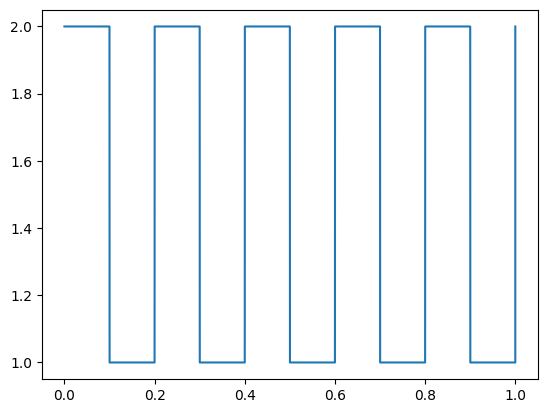

In [6]:
def a_eps(x,eps):
    return np.where((x/eps)%1 < 0.5,2,1)
def a_per(y):
    return np.where((y)%1 < 0.5,2,1)
def f(x):
    return 1+x
eps = 1/5
plt.plot(X,a_per(X/eps))

Dans ce cas on connait explicitement la valeur de $a^*$ qui vaut $\frac{4}{3}$

C:\Users\ethem\Desktop\stage-m1\homogenization-learn\code_python\a_compute.py:39: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A,b)


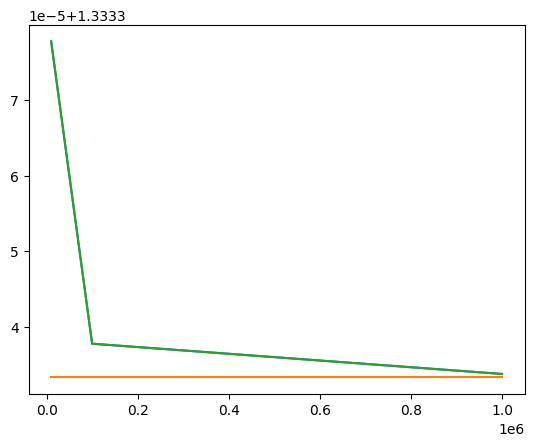

In [7]:
k_list = np.linspace(4,6,3,dtype=int)
n_list = 10**k_list
a_star = 4/3*np.ones(3)

a_star1_list = []
a_star2_list =[]
for i in n_list:
    X = np.linspace(a,b,i+1)
    h=X[1]-X[0]
    A_per = a_per(X/eps)
    a_star1 = homogenization.compute_a_star(A_per)
    a_star1_list.append(a_star1)
    a_star2 = homogenization.compute_corrected_a(i,h,A_per)
    a_star2_list.append(a_star1)
plt.plot(n_list,a_star1_list)
plt.plot(n_list,a_star)
plt.plot(n_list,a_star2_list)

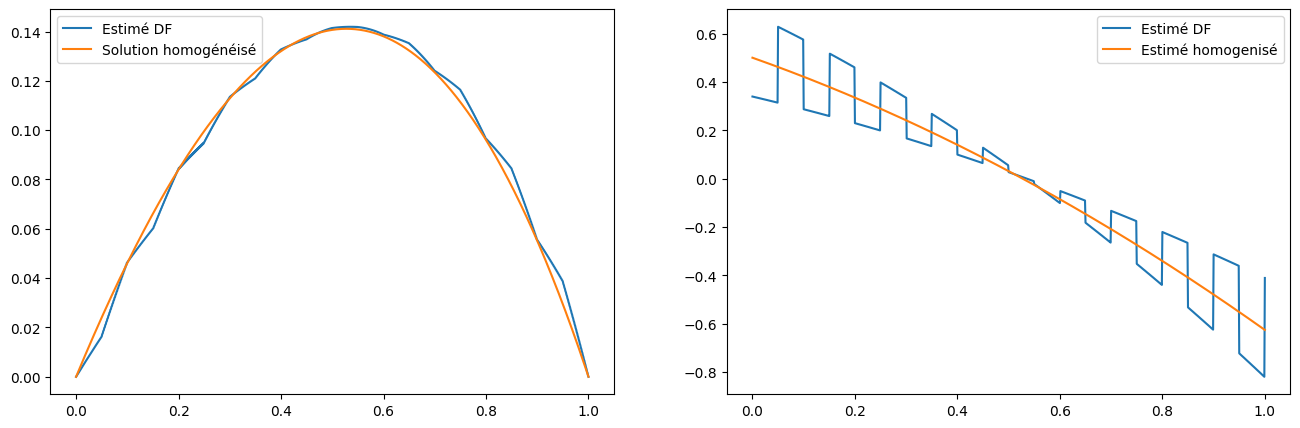

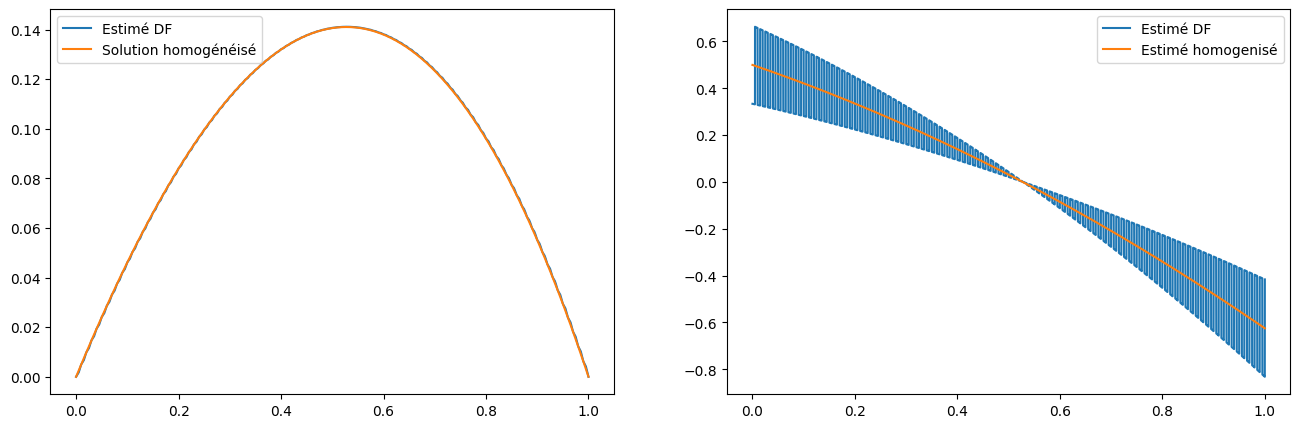

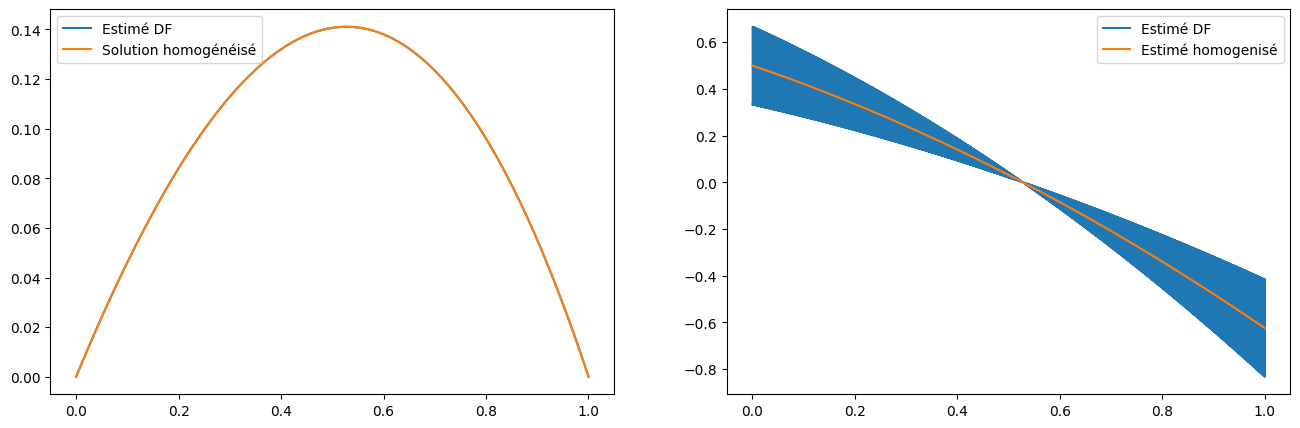

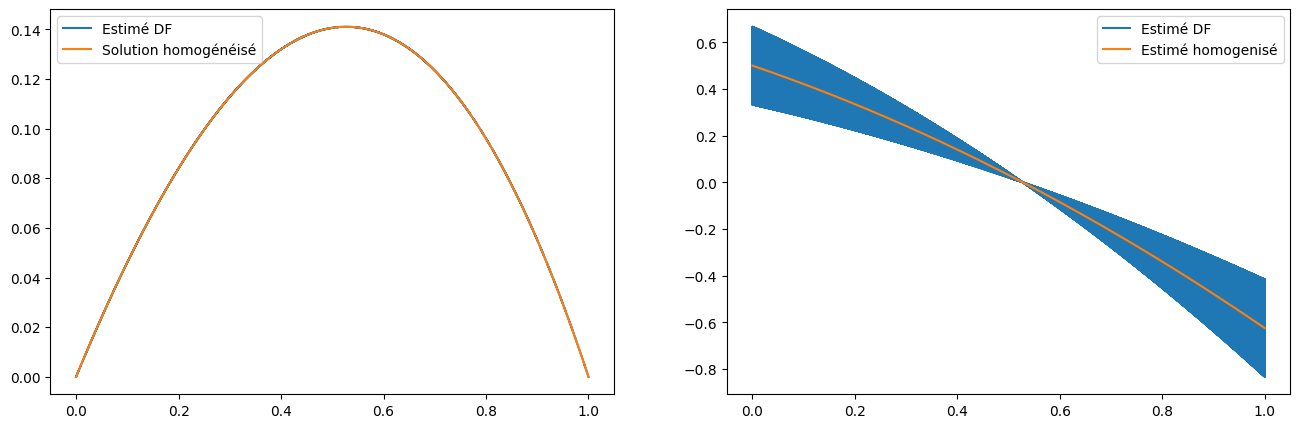

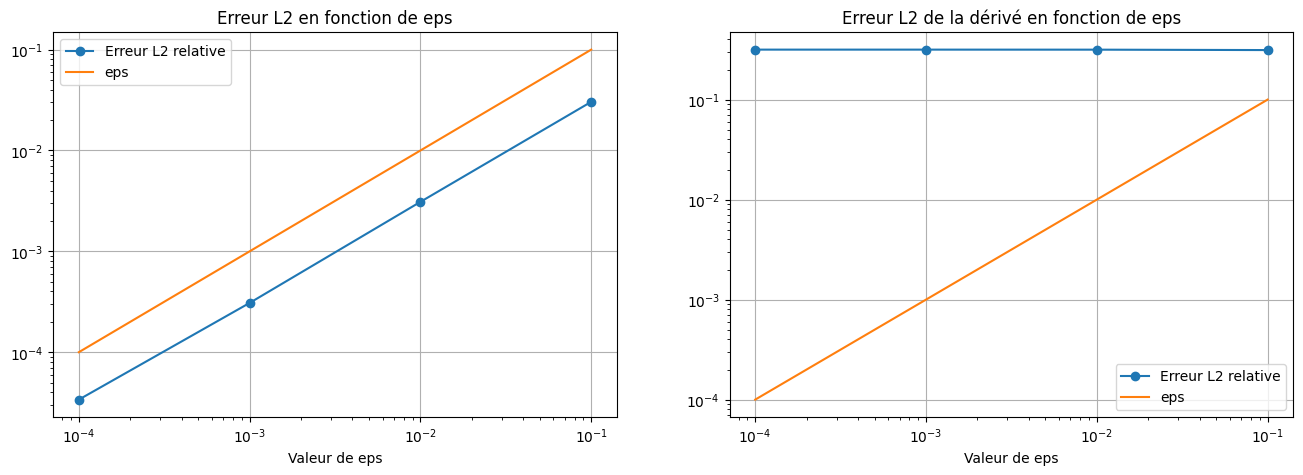

In [8]:
k_list = np.linspace(1,4,4,dtype=int)
number_of_periode_list = 10**k_list
eps_list = 1/number_of_periode_list

number_of_discretization = 100

error_list = []
error_list_p = []
h_value = []
for number_of_periode in number_of_periode_list:
    eps = 1/number_of_periode
    h=eps/number_of_discretization
    i = number_of_periode*number_of_discretization
    X = np.linspace(a,b,i+1)
    Y = X/eps
    A_eps = a_eps(X,eps)
    A_per = a_per(Y)
    F = f(X)
    a_star = homogenization.compute_a_star(A_per)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_est)
    error_list.append(err)
    h_value.append(h)

    fig = plt.figure(figsize=(16,5))
    ax = plt.subplot(1,2,1)
    ax.plot(X,U_est,label='Estimé DF')
    ax.plot(X,U_homo,label='Solution homogénéisé')
    ax.legend()

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    ax = plt.subplot(1,2,2)
    ax.plot(X,Uprime,label='Estimé DF')
    ax.plot(X,Uprimeh,label='Estimé homogenisé')
    ax.legend()
    plt.show()
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))
    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, eps_list, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, eps_list, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()

Remarquons qu'il n'y a pas de convergence forte dans $H^1$ mais seulement dans $L^2$ quand $\epsilon$ tend vers 0

# Mise en place des correcteurs

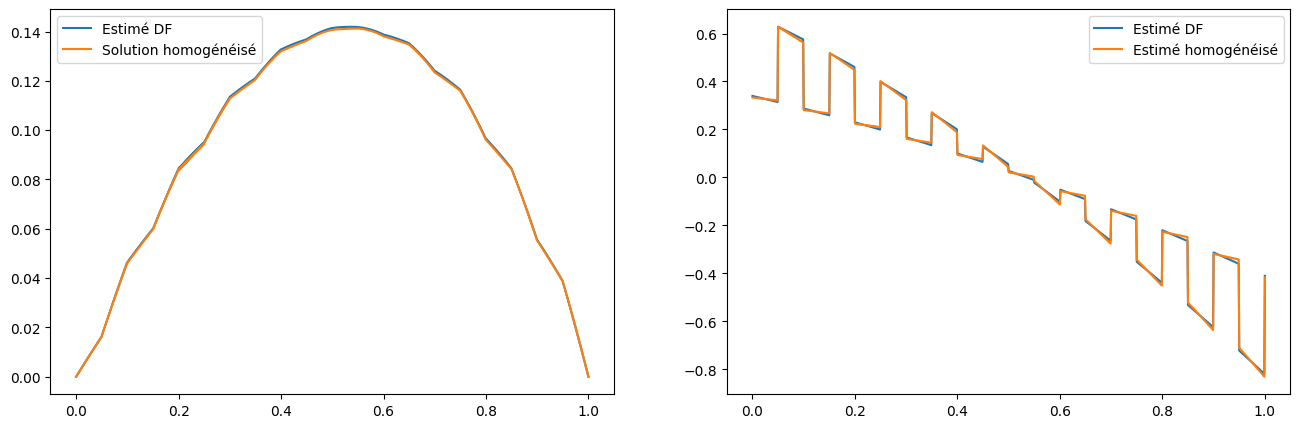

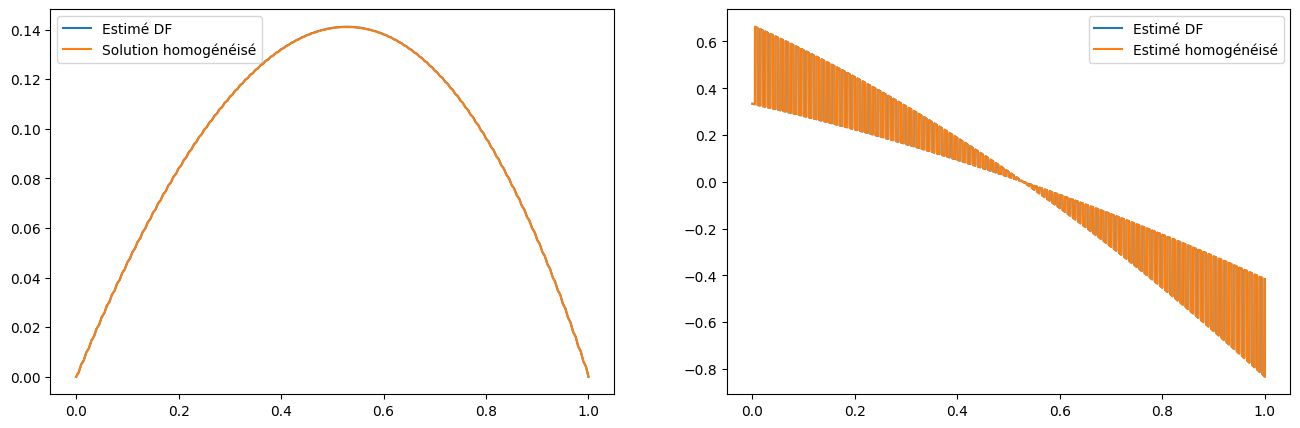

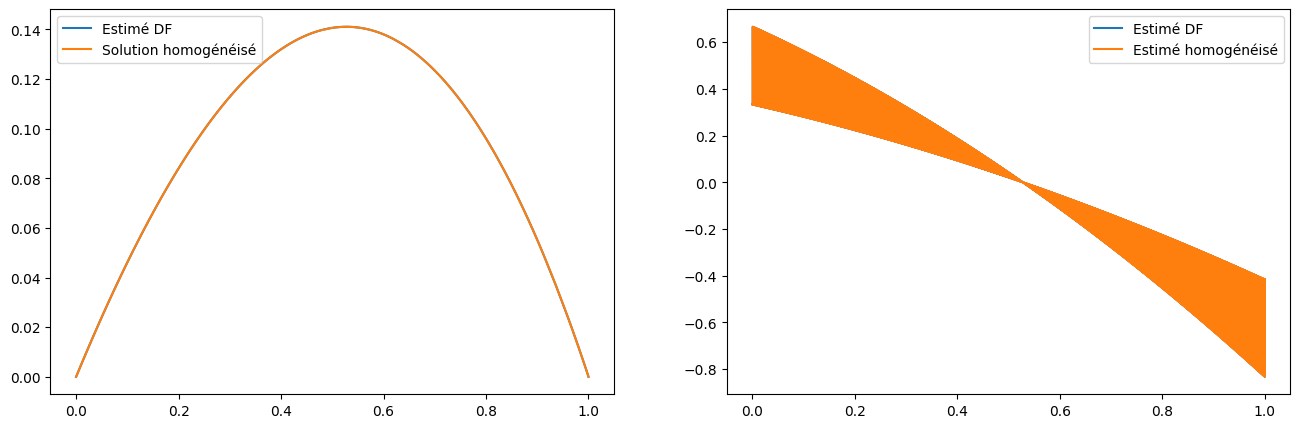

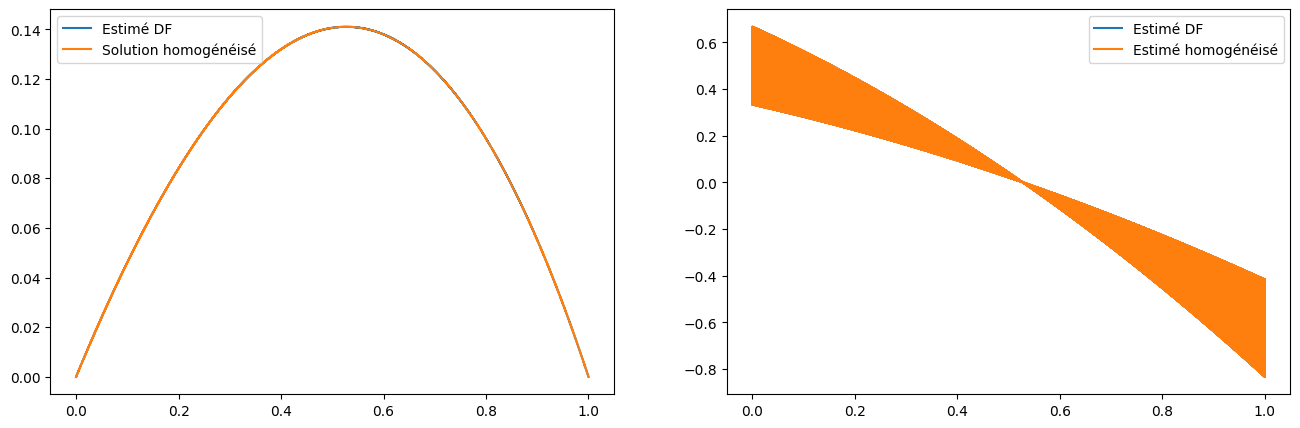

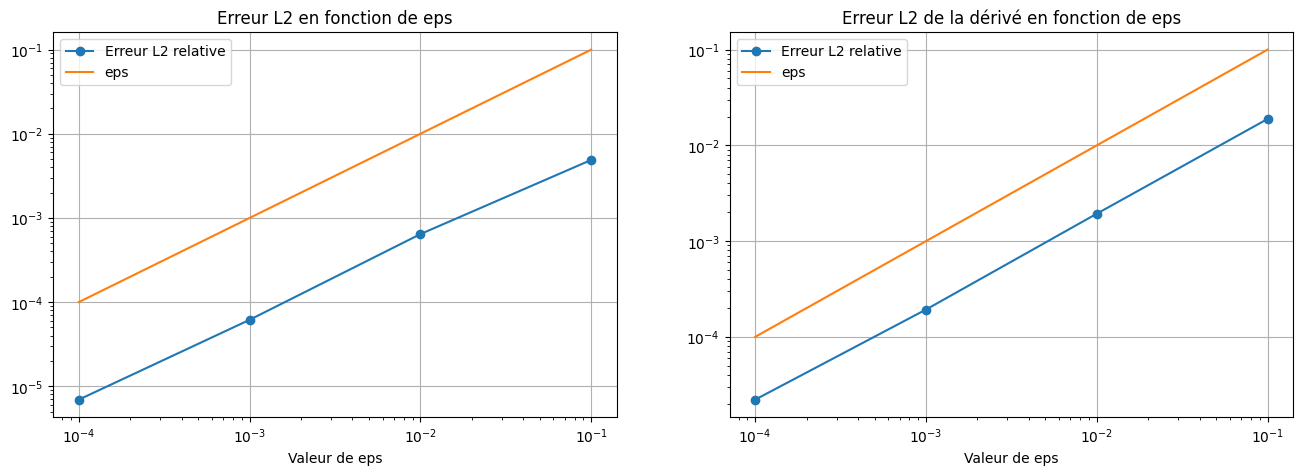

In [9]:
k_list = np.linspace(1,4,4,dtype=int)
number_of_periode_list = 10**k_list
eps_list = 1/number_of_periode_list

number_of_discretization = 100

error_list = []
error_list_p = []
h_value = []
for number_of_periode in number_of_periode_list:
    eps = 1/number_of_periode
    h=eps/number_of_discretization
    i = number_of_periode*number_of_discretization
    X = np.linspace(a,b,i+1)
    Y= X/eps
    A_eps = a_eps(X,eps)
    A_per = a_per(Y)

    h = abs(X[1]-X[0])
    F = f(X)

    w = homogenization.DF_solve_corrector(i,h/eps,A_per)

    a_star = homogenization.compute_a_star(A_eps)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    U_homo = U_homo + eps * homogenization.compute_a_derive(U_homo,h)* w

    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_homo)
    error_list.append(err)
    h_value.append(h)

    fig = plt.figure(figsize=(16,5))
    ax = plt.subplot(1,2,1)
    ax.plot(X,U_est,label='Estimé DF')
    ax.plot(X,U_homo,label='Solution homogénéisé')
    ax.legend()

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    ax = plt.subplot(1,2,2)
    ax.plot(X,Uprime,label='Estimé DF')
    ax.plot(X,Uprimeh,label='Estimé homogénéisé')
    ax.legend()
    plt.show()
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))
    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, eps_list, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, eps_list, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()